# Exercise: Object Counting Using YOLO with a Line in the Middle of the Frame
In this exercise, you will implement an object counting system using YOLOv8. You will process a video and count the number of objects crossing a line drawn in the middle of the frame. Follow the steps below to complete the exercise.

## Objective:
The goal is to load a video, detect objects, count them as they cross a line, and save the processed video with the results.

## Steps to Complete:

### Step 1: Install the Required Libraries
- Install the `ultralytics` library using pip to work with YOLOv8.
- Also ensure you have OpenCV installed for video processing.

_Hint_: You can install a library using the `!pip install` command in a code cell.

In [11]:
!pip install ultralytics -q

### Step 2: Import the Libraries
- Import the necessary libraries, including `cv2` from OpenCV and `YOLO` from `ultralytics`.
- You will also need to import any other required libraries for object counting and video handling.

In [12]:
import cv2
from ultralytics import YOLO, solutions

### Step 3: Load the YOLO Model
- Load the pre-trained YOLOv8 model (e.g., `yolov8n.pt`) to perform object detection and tracking.

In [13]:
model = YOLO('yolov8n.pt')

### Step 4: Capture and Process the Video
- Use OpenCV to capture the video from a specified file path.
- Ensure the video file opens successfully and retrieve the video properties (such as width, height, and frames per second).

In [14]:
cap = cv2.VideoCapture('vehicle-counting.mp4')
assert cap.isOpened(), 'Error reading video file'
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

### Step 5: Define the Line in the Middle of the Frame
- Calculate the vertical middle of the frame using the height of the video.
- Define two points to represent a horizontal line in the middle of the frame.

In [21]:
mid_y = h // 2
line_points = [(20, mid_y), (w - 20, mid_y)]

### Step 6: Set Up the Video Writer
- Create a video writer object to save the output video in MP4 format.
- Choose the appropriate codec and ensure the output video properties match the input video.

In [22]:
video_writer = cv2.VideoWriter('object_counting_output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))

### Step 7: Initialize the Object Counter
- Use the `solutions.ObjectCounter` class to handle the object counting logic.
- Pass in the necessary parameters, including the line points, object names, and any visual settings.

In [23]:
counter = solutions.ObjectCounter(
    view_img=True,
    reg_pts=line_points,
    names=model.names,
    draw_tracks=True,
    line_thickness=3,
)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Line Counter Initiated.


### Step 8: Process the Video Frames
- Loop through each frame of the video using OpenCV.
- Apply YOLOv8 to detect and track objects in each frame.
- Use the object counter to count the number of objects crossing the line.
- Write each processed frame to the output video.

In [24]:
while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print('Video frame is empty or video processing has been successfully completed.')
        break

    # Perform object tracking
    tracks = model.track(im0, persist=True, show=False)

    # Count objects and draw the middle line
    im0 = counter.start_counting(im0, tracks)
    video_writer.write(im0)


0: 384x640 2 cars, 165.7ms
Speed: 9.8ms preprocess, 165.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 165.7ms
Speed: 4.1ms preprocess, 165.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 152.1ms
Speed: 5.1ms preprocess, 152.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 152.3ms
Speed: 4.4ms preprocess, 152.3ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 181.4ms
Speed: 5.5ms preprocess, 181.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 165.9ms
Speed: 4.1ms preprocess, 165.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 168.0ms
Speed: 4.1ms preprocess, 168.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 156.5ms
Speed: 4.3ms preprocess, 156.5ms inference, 1.2ms postprocess per image at shape (1, 3, 38

### Step 9: Release Resources
- Once the video processing is complete, release the video capture and writer objects.
- Close any OpenCV windows that were opened during the process.

In [25]:
cap.release()
video_writer.release()
cv2.destroyAllWindows()

### Conclusion
By completing this exercise, you will have implemented an object counting system using YOLOv8 and OpenCV. The final output will be a video with objects counted as they cross a line in the middle of the frame.

#output


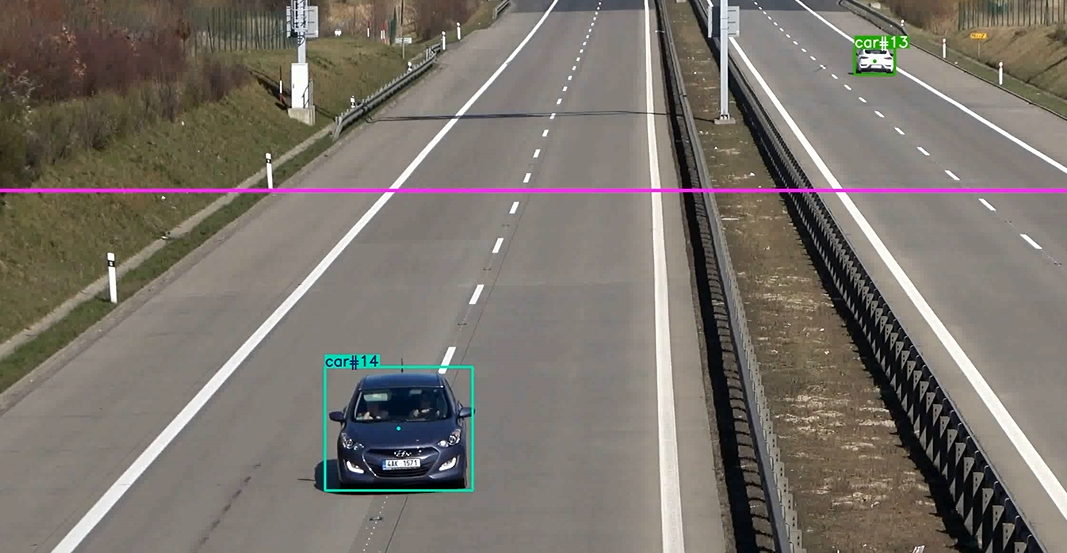